In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import math

# LOADING THE DATA
# The coordinates of each city are loaded into the list "list" which has for entries [coord1,coord2] for each city.

list=[]
with open("nn.txt") as file:
    for line in file:
        line = line
        list.append(line)#preprocess line
list.pop(0)
list=[ x.split() for x in list]
list=[[float(x[1]),float(x[2])] for x in list]

print('Number of cities: '+str(len(list)))

Number of cities: 33708


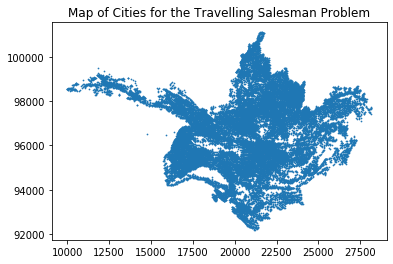

In [2]:
# PLOTTING THE CITIES OF THE TRAVELLING SALESMAN PROBLEM

x_coord=[ i[0] for i in list]
y_coord=[ i[1] for i in list]
labels = range(1,len(list)+1)

fig, ax = plt.subplots()
plt.title(r'Map of Cities for the Travelling Salesman Problem')
ax.scatter(x_coord, y_coord,s=0.5)

In [3]:
# CODE FOR THE TRAVELLING SALESMAN PROBLEM (TSM) WITH A NEAREST-NEIGHBOOR (NN) HEURISTIC ALGORITHM

def Travelling_Salesman_Problem_NN_Heuristic(List):

    n=len(List)

    # The city coordinates to be used for the Travelling Salesman Problem are loaded from the input list into a 
    # dictionary called "City_Coord". The keys correspond to an integer number labelling the city and the values
    # in the dictionary are 2-tuples containing the coordinates of each city.
    City_Coord={}
    for i in range(1,1+len(List)):
        City_Coord[i]=np.array(List[i-1])
        Cities_Not_Visited=set(City_Coord.keys())
        
    Cities_Visited=set()
    Path=[1]
    Path_Length=0

    Current_City=1
    Cities_Visited.add(Current_City)
    Cities_Not_Visited.remove(Current_City)

    while len(Cities_Visited)<n:
        Temp_City=float('inf')
        Temp_Distance=float('inf')
        for j in Cities_Not_Visited:
            Dist=np.linalg.norm(City_Coord[Current_City]-City_Coord[j])
            if Dist<Temp_Distance:
                Temp_City=j
                Temp_Distance=Dist
            if Dist==Temp_Distance:
                Temp_City=min(Temp_City,j)
    
        Cities_Visited.add(Temp_City)
        Cities_Not_Visited.remove(Temp_City)
    
        Path_Length+=Temp_Distance
        Path.append(Temp_City)
        Current_City=Temp_City

    return (math.floor(Path_Length+np.linalg.norm(City_Coord[Path[-1]]-City_Coord[1])),Path)

In [4]:
# APPLYING THE CODE FOR THE TRAVELLING SALESMAN PROBLEM ALGORITHM WITH NN HEURISTIC

Result=Travelling_Salesman_Problem_NN_Heuristic(list)
print(Result[0])

1203406
